In [3]:
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display
from typing_extensions import TypedDict

In [4]:
class State(TypedDict):
    graph_state: str

In [5]:
def read_node(state : State) -> State:
    print("Reading Node", state)
    return {"graph_state": state['graph_state'] +" Reading "}

def process_node(state : State) -> State:
    print("Processing Node",  state)
    return {"graph_state": state['graph_state'] +" Processing "}

def write_node(state : State) -> State:
    print("Writing Node", state)
    return {"graph_state": state['graph_state'] +" Writing "}

In [6]:
# Build graph
builder = StateGraph(State) 
builder.add_node("read", read_node)
builder.add_node("process", process_node)
builder.add_node("write", write_node)

In [7]:
# Edge define the flow by connecting nodes 
builder.add_edge(START, "read")
builder.add_edge("read", "process")
builder.add_edge("process", "write")
builder.add_edge("write", END)

In [8]:
# Create graph
graph = builder.compile()

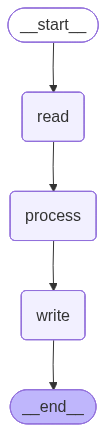

In [9]:
# Display Graph
display(Image(graph.get_graph().draw_mermaid_png()))

In [10]:
# Invoke graph with initial state 
result = graph.invoke({"graph_state" : "Started "})
print(result)

Reading Node {'graph_state': 'Started '}
Processing Node {'graph_state': 'Started  Reading '}
Writing Node {'graph_state': 'Started  Reading  Processing '}
{'graph_state': 'Started  Reading  Processing  Writing '}
